In [6]:
import numpy as np
from error_analysis_funs import *
from matplotlib import rcParams

In [7]:
def read_data(filename_template, method, num_phases, eps, alpha, gamma, final_errors, reps):
    failures = 0
    exits = 0
    errors = []
    costs = []
    files_found = 0
    for final_error in final_errors:
            for rep in reps:
                try:
                    e, c, f = np.load(
                        filename_template.format(method, num_phases, eps, final_error, alpha, gamma, rep),
                        allow_pickle = True)
                    e = np.concatenate(e[0]).reshape(n_sim, num_phases)
                    errors.append(e)
                    costs.append(c[0])
                    exits+=np.sum(f)
                    failures+=np.sum(np.logical_and(np.any(e > final_error,1), np.logical_not(f)))
                    files_found+=1
                except FileNotFoundError:
                    pass
                    #print('File not found', final_error, rep)
    print('Files found:', files_found)
    try:
        print('Exits:   ', 100*exits/files_found/n_sim, '%')
        print('Failures:', 100*failures/files_found/n_sim, '%')
    except ZeroDivisionError:
        pass
    return errors, costs

# Check plots

<>:21: DeprecationWarning: invalid escape sequence \e
<>:21: DeprecationWarning: invalid escape sequence \e
<>:21: DeprecationWarning: invalid escape sequence \e
<ipython-input-52-72b27908fdfc>:21: DeprecationWarning: invalid escape sequence \e
  plt.title(f'{method}, $\epsilon = {eps}$')


pencil 0.06
Files found: 50
Exits:    0.0 %
Failures: 0.0 %
[1.e+11 1.e+13 1.e+15 1.e+17]
[4, 240, 174, 82]
Factor: [95499.82050598]
pencil 0.05
Files found: 50
Exits:    0.0 %
Failures: 0.0 %
[1.e+12 1.e+14 1.e+16 1.e+18]
[92, 208, 130, 70]
Factor: [245901.6680137]
pencil 0.04
Files found: 50
Exits:    0.0 %
Failures: 0.0 %
[1.e+13 1.e+15 1.e+17]
[100, 200, 200]
Factor: [264954.83250177]
pencil 0.03
Files found: 50
Exits:    0.0 %
Failures: 0.0 %
[1.e+14 1.e+16 1.e+18]
[100, 226, 174]
Factor: [1043749.56996421]
pencil 0.02
Files found: 50
Exits:    0.0 %
Failures: 0.0 %
[1.e+15 1.e+17 1.e+19]
[100, 200, 200]
Factor: [850220.15174736]
pencil 0.01
Files found: 50
Exits:    0.0 %
Failures: 0.0 %
[1.e+17 1.e+19 1.e+21]
[200, 200, 100]
Factor: [5499405.65115423]
qeep-cons 0.06
Files found: 50
Exits:    4.0 %
Failures: 0.0 %
[1.e+10 1.e+12 1.e+14 1.e+16]
[8, 156, 164, 172]
Factor: [3.72651242e+09]
qeep-cons 0.05
Files found: 50
Exits:    0.0 %
Failures: 0.0 %
[1.e+12 1.e+14 1.e+16 1.e+18]
[

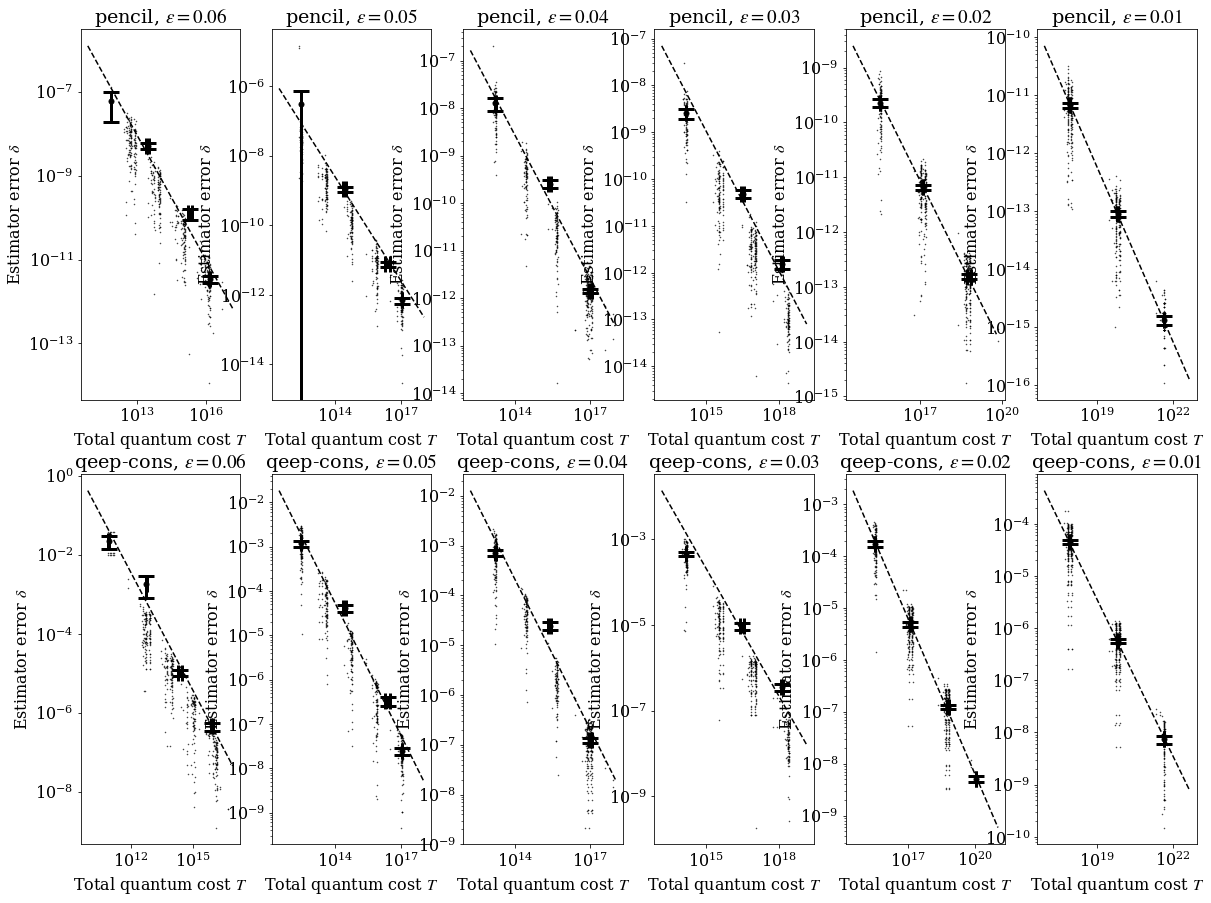

In [52]:
num_phases = 2
alpha = 2.
gamma = 2.1
n_sim = 5

final_errors = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
reps = [0,1,2,3,4,5,6,7,8,9]
epsilons = [0.06, 0.05, 0.04, 0.03, 0.02, 0.01]

filename_template = 'qpe_data/errors_costs_failures_{}_phases_{}_eps_{}_final-error_{}_alpha_{}_gamma_{}_rep_{}.npy'


plt.figure(figsize = (20, 15))
i = 0
for method in ['pencil', 'qeep-cons']:
    for eps in epsilons:
        print(method, eps)
        i+=1
        plt.subplot(2,len(epsilons),i)
        errors, costs = read_data(filename_template, method, num_phases, eps, alpha, gamma, final_errors, reps)
        plt.title(f'{method}, $\epsilon = {eps}$')
        try:
            plot_estimation_errors(costs, errors)
        except ValueError:
            print('No files')

In [ ]:
method = 'pencil'
num_phases = 4
n_sim = 5
eps = 0.009
alpha = 2.
gamma = 2.1

final_errors = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
reps = [0,1,2,3,4,5,6,7,8,9]

filename_template = 'qpe_data/errors_costs_failures_{}_phases_{}_eps_{}_final-error_{}_alpha_{}_gamma_{}_rep_{}.npy'


errors = []
costs = []
files_found = 0
for final_error in final_errors:
    print(final_error)
    exits = 0
    failures = 0
    where_exits = []
    where_failures = []
    where = []
    print('Final error:', final_error)
    for rep in reps:
        try:
            e, c, f = np.load(
                filename_template.format(method, num_phases, eps, final_error, alpha, gamma, rep),
                allow_pickle = True)
            e = np.concatenate(e[0]).reshape(n_sim, num_phases)
            if np.max(e) > final_error:
                print(np.max(e))
            errors.append(e)
            costs.append(c[0])
            files_found+=1
            exits+=np.sum(f)
            failures+=np.sum(np.logical_and(np.any(e > final_error,1), np.logical_not(f)))
            for i in np.unique(np.where(f)[1]):
                where_exits.append((rep, i))
            for i in np.unique(np.where(e > final_error)[0]):
                where_failures.append((rep, i))
            for i in np.unique(np.where(e > 0.1)[0]):
                where.append((rep, i))
        except FileNotFoundError:
            print('File not found', final_error, rep)
    print('Exits: ', exits)
    print('Failures:', failures)
    #print('E&F:', sorted(list(set(where_exits).intersection(where_failures))))
    #print('E-F:', sorted(list(set(where_exits).difference(where_failures))))
    #print('F-E:', sorted(list(set(where_failures).difference(where_exits))))
    #print('Fail', where)
    #print(sorted(list(set(where).difference(where_exits))))
    print(where_exits)
print('Files found:', files_found)
plt.title(f'{method}, $n_\phi = {num_phases}$, $\epsilon = {eps}$')
plot_estimation_errors(costs, errors)

# Final plots

In [52]:
def final_plot_estimation_errors(costs_big, est_errors_big, color = 'black', midpoints = None):
    if midpoints is None:
        midpoints = np.sort(np.kron(10**np.arange(
             start = np.floor(np.log10(np.min([np.min(c) for c in costs_big]))),
             stop = 1+np.ceil(np.log10(np.max([np.max(c) for c in costs_big]))),
             step = 2), [1]))
    log_midpoints = np.log(midpoints)
    log_edges = 0.5 * (log_midpoints[:-1] + log_midpoints[1:])
    edges = np.exp(log_edges)
    right_edge = max(edges)
    num_edges = len(edges)
    bin_xvals = [[] for x in midpoints]
    bin_yvals = [[] for x in midpoints]
    for costs, est_errors in zip(costs_big, est_errors_big):
        for cvec, errorvec in zip(costs, est_errors):
            for c, error in zip(cvec, errorvec):
                if c > right_edge:
                    bin_xvals[-1].append(c)
                    bin_yvals[-1].append(error)
                else:
                    index = min([j for j in range(num_edges) if edges[j] > c])
                    bin_xvals[index].append(c)
                    bin_yvals[index].append(error)
                    
    print('midpoints:\n', midpoints)
    print('points per bin:\n', [len(b) for b in bin_xvals])
    
    for n in range(num_edges, -1, -1):
        if len(bin_xvals[n]) == 0:
            del bin_xvals[n]
            del bin_yvals[n]
            
    binx_means = [np.mean(b) for b in bin_xvals]
    binx_err = [np.std(b) / np.sqrt(len(b)) * 2 for b in bin_xvals]
    biny_means = [np.mean(b) for b in bin_yvals]
    biny_err = [np.std(b) / np.sqrt(len(b)) * 2 for b in bin_yvals]
    
    print('mean error per bin \n', biny_means)
    print('error deviation per bin \n', biny_err)
    
    factor = np.exp(np.polyfit(np.zeros(len(binx_means)), np.log(binx_means)+np.log(biny_means), 0))
    print('Factor:',factor)
    xvec_temp = np.linspace(min(binx_means)/1e1, max(binx_means)*1e1)
    plt.plot(xvec_temp, factor/xvec_temp, '--', color = color)
    
    plt.plot([x for b in bin_xvals for x in b], [y for b in bin_yvals for y in b],
             '.', markersize = 1, color = color, alpha = 0.8)
    #plt.plot(binx_means, biny_means, 'r+', markersize=20, markeredgewidth=3)
    plt.plot(binx_means, biny_means, 'o', markersize=5, color = color)
    plt.errorbar(binx_means, biny_means, yerr=biny_err, xerr=binx_err, fmt='.',
                 color=color, capsize=8, capthick=3, linewidth=3)
    plt.xscale('log')
    plt.yscale('log')
    #plt.plot(midpoints, 5000/midpoints, 'b--', label=r'$y\sim 1/x$')
    plt.xlabel(r'Total quantum cost $T$')
    plt.ylabel(r'Estimator error $\delta$')
    
    #plt.vlines(edges, 1e-13, 1)

In [9]:
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'


rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

rcParams['font.sans-serif'] = 'Modern Roman'
rcParams['font.family'] = "serif"

rcParams['font.size'] = 16

In [36]:
alpha = 2.
gamma = 2.1
n_sim = 5

final_errors = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
reps = [0,1,2,3,4,5,6,7,8,9]


filename_template = 'qpe_data/errors_costs_failures_{}_phases_{}_eps_{}_final-error_{}_alpha_{}_gamma_{}_rep_{}.npy'




eps = 0.01
num_phases = 4
errors_somma, costs_somma = read_data(filename_template, 'qeep-cons', num_phases, eps, alpha, gamma, final_errors, reps)
errors_prony, costs_prony = read_data(filename_template, 'pencil', num_phases, eps, alpha, gamma, final_errors, reps)


eps = 0.05
num_phases = 2
errors_somma2, costs_somma2 = read_data(filename_template, 'qeep-cons', num_phases, eps, alpha, gamma, final_errors, reps)
errors_prony2, costs_prony2 = read_data(filename_template, 'pencil', num_phases, eps, alpha, gamma, final_errors, reps)

Files found: 50
Exits:    0.0 %
Failures: 0.0 %
Files found: 50
Exits:    0.0 %
Failures: 0.0 %
Files found: 50
Exits:    0.0 %
Failures: 0.0 %
Files found: 50
Exits:    0.0 %
Failures: 0.0 %


[1.e+17 1.e+19 1.e+21]
[364, 240, 396]
Factor: [4.57734977e+13]
[1e+16, 1e+17, 1e+19, 1e+21]
[0, 372, 228, 400]
Factor: [14754320.84395924]


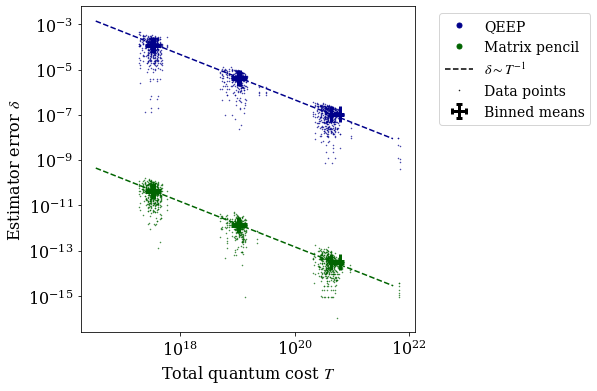

In [13]:
color_somma = 'darkblue'
color_prony = 'darkgreen'


plt.figure(figsize = (6, 6))
final_plot_estimation_errors(costs_somma, errors_somma, color_somma)
final_plot_estimation_errors(costs_prony, errors_prony, color_prony, midpoints = [1e16, 1e17, 1e19, 1e21])

plt.errorbar([],[],[], [], '.', color='black', capsize=3, capthick=3, linewidth = 3, label = 'Binned means')
plt.plot([],[], '.', color = color_somma, markersize = 10, label = r'QEEP')
# plt.plot([],[], '.', color = color_somma_lc, markersize = 10, label = r'QEEP low conf. ($34\%$ failed)')
plt.plot([],[], '.', color = color_prony, markersize = 10, label = r'Matrix pencil')
plt.plot([],[], '--', color = 'black', label = r'$\delta \sim T^{-1}$')
plt.plot([],[], '.', color = 'black', markersize = 1, label = r'Data points')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

#print(plt.gca().get_ylim())
#plt.xlim(1.5e5, 7e9)
#plt.ylim(1e-13, 0.8)
#plt.savefig('error_vs_cost_plot.pdf',bbox_inches='tight')
plt.show()

2 phases
QEEP
midpoints:
 [1000000000000.0, 10000000000000.0, 1000000000000000.0, 1e+16, 1e+17]
points per bin:
 [86, 114, 102, 98, 100]
mean error per bin 
 [0.0012003506394658587, 0.00010502382362763815, 5.509773567197718e-06, 3.757326436996972e-07, 2.7889071843034686e-08]
error deviation per bin 
 [0.0001842383930111459, 4.064148506555311e-05, 8.357861118568897e-07, 6.226638558836717e-08, 4.016474515763993e-09]
Factor: [3.15628652e+09]
Pencil
midpoints:
 [1000000000000.0, 10000000000000.0, 1000000000000000.0, 1e+16, 1e+17]
points per bin:
 [90, 110, 102, 98, 100]
mean error per bin 
 [3.1966941405367796e-07, 2.483342935896945e-09, 1.6183535883944742e-10, 9.55476825777038e-12, 7.739916346727327e-13]
error deviation per bin 
 [4.0967742243044284e-07, 8.439040390395115e-10, 3.558137976025709e-11, 1.5939127027481068e-12, 1.2459272134497325e-13]
Factor: [132833.54863449]
4 phases
QEEP
midpoints:
 [1e+17, 1e+19, 1e+21, 1e+22]
points per bin:
 [364, 240, 388, 8]
mean error per bin 
 [0.000

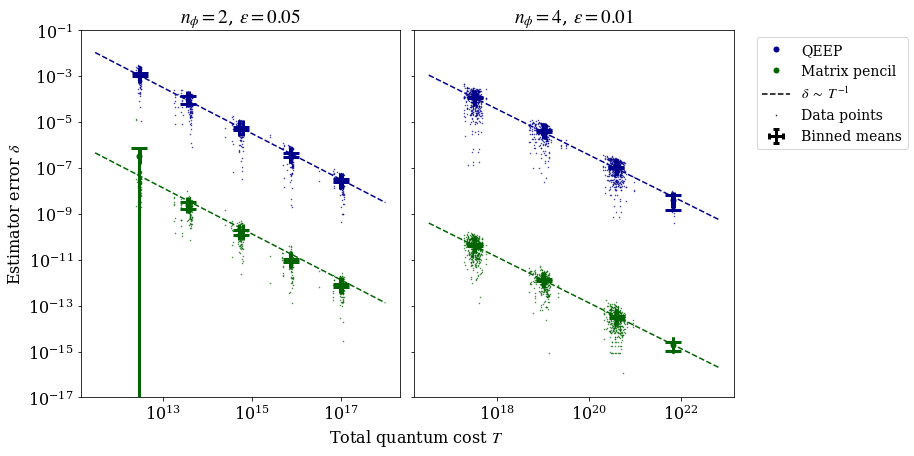

In [54]:
color_somma = 'darkblue'
color_prony = 'darkgreen'


plt.figure(figsize = (10, 6))

print('2 phases')
plt.subplot(1,2,1)
plt.tight_layout(w_pad=0.1)
plt.ylim((1e-17, 1e-1))

print('QEEP')
final_plot_estimation_errors(costs_somma2, errors_somma2, color_somma, midpoints = [1e12, 1e13, 1e15, 1e16, 1e17])
print('Pencil')
final_plot_estimation_errors(costs_prony2, errors_prony2, color_prony, midpoints = [1e12, 1e13, 1e15, 1e16, 1e17])
plt.title(r'$n_\phi = 2$, $\epsilon = 0.05$')

plt.xlabel(r'Total quantum cost $T$', x = 1.05)
#plt.gca().set_xlabel('hey', loc='right')

print('4 phases')
plt.subplot(1,2,2)
plt.ylim((1e-17, 1e-1))

print('QEEP')
final_plot_estimation_errors(costs_somma, errors_somma, color_somma, midpoints = [1e17, 1e19, 1e21, 1e22])
print('Pencil')
final_plot_estimation_errors(costs_prony, errors_prony, color_prony, midpoints = [1e17, 1e19, 1e21, 1e22])
plt.title(r'$n_\phi = 4$, $\epsilon = 0.01$')

plt.ylabel('')
plt.xlabel('')
plt.gca().set_yticklabels([])

plt.errorbar([],[],[], [], '.', color='black', capsize=3, capthick=3, linewidth = 3, label = 'Binned means')
plt.plot([],[], '.', color = color_somma, markersize = 10, label = r'QEEP')
# plt.plot([],[], '.', color = color_somma_lc, markersize = 10, label = r'QEEP low conf. ($34\%$ failed)')
plt.plot([],[], '.', color = color_prony, markersize = 10, label = r'Matrix pencil')
plt.plot([],[], '--', color = 'black', label = r'$\delta\ \sim\ T^{-1}$')
plt.plot([],[], '.', color = 'black', markersize = 1, label = r'Data points')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

plt.savefig('error_vs_cost_plot.pdf',bbox_inches='tight')
plt.show()

# Outliers

In [18]:
np.where(np.array(errors_prony2)>1e-6)

(array([0, 0]), array([1, 1]), array([0, 1]))

In [21]:
print(costs_prony2[0][1][0], errors_prony2[0][1][0])
print(costs_prony2[0][1][1], errors_prony2[0][1][1])

2386293859272.3584 1.2060975947414398e-05
2386293859272.3584 1.426509121316144e-05


In [41]:
eps = 0.05
num_phases = 2
method = 'pencil'
final_error = 0.01
rep = 0
alpha = 2.
gamma = 2.1

file = filename_template.format(method, num_phases, eps, final_error, alpha, gamma, rep)
e,c,f = np.load(
    file,
    allow_pickle = True)

print(file)
print(e[0][1])

qpe_data/errors_costs_failures_pencil_phases_2_eps_0.05_final-error_0.01_alpha_2.0_gamma_2.1_rep_0.npy
[1.2060975947414398e-05, 1.426509121316144e-05]


/marisdata/easybuild/software/QuantumMiniconda3/4.7.10/lib/python3.7/site-packages/ipykernel_launcher.py:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='out/qpe_pencil_2_0.05_0.01_2_2.1_5_0.out' mode='r' encoding='UTF-8'>
  if sys.path[0] == '':


In [39]:
f = open(f"out/qpe_{method}_{num_phases}_{eps}_{final_error}_{int(alpha)}_{gamma}_{n_sim}_{rep}.out", 'r')
print(f.read())

Processing final error: 0.01
0 Started at: 2021-06-18 13:59:29.339693
[2.35330497 5.97351416]
('success', 2)
Executed in: 0:00:00.524059
1 Started at: 2021-06-18 13:59:29.863775
[0.98029403 0.98014248]
('success', 2)
Executed in: 0:00:00.507403
2 Started at: 2021-06-18 13:59:30.371204
[3.77691701 4.44895122]
('success', 2)
Executed in: 0:00:00.485800
3 Started at: 2021-06-18 13:59:30.857041
[5.23039137 1.33416598]
('success', 2)
Executed in: 0:00:00.489779
4 Started at: 2021-06-18 13:59:31.346843
[1.91161039 3.2971419 ]
('success', 2)
Executed in: 0:00:00.536024
Proportion of simulations exited before last order:0.0%



In [43]:
phases = [0.98029403, 0.98014248]
amplitudes = np.ones(num_phases)/num_phases
cutoff = 1/3/num_phases

In [48]:
all_phase_estimates, costs, error_flag = multiorder_estimation(method,
                             phases, amplitudes,
                             eps, alpha, gamma,
                             final_error, cutoff)
errors = get_estimation_errors(all_phase_estimates, phases)
print(all_phase_estimates)
print(costs)
print(error_flag)
print(errors)

[[0.980218374600489], array([0.98014577, 0.98029755])]
[[276095623560, 276095623560], [2386293859272.3584, 2386293859272.3584]]
('success', 2)
[3.5200758308207014e-06, 3.294495252603724e-06]


In [55]:
mean = 3.1966941405367796e-07
sd = 4.0967742243044284e-07
print(mean+sd, mean-sd)

7.293468364841208e-07 -9.000800837676488e-08
